**ROCK PAPER SCISSORS IMAGE CLASSIFICATION WITH KERAS**

**OBJEKTIF**
Membuat model deep learning untuk prediksi gambar rock, paper, scissors

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback,ModelCheckpoint,CSVLogger
from sklearn.model_selection import train_test_split
from google.colab import files
import os

In [2]:
# mendownload zip file dari url, file yang didownload akan ditempatkan di folder content
# lokasi untuk pembangunan model dari awal hingga akhir akan dilakukan di dalam folder content
# dan subfoldernya yang nantinya akan dibuat juga
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-07-24 06:15:29--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  4.75MB/s    in 74s     

2020-07-24 06:16:44 (4.16 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# mengekstrak file zip dapat dilakukan dengan mudah,cepat dan simpe dengan unzip 
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6Cay.png  
  inflating: rockpaperscissors/scissors/2DEYFsJ27UgVq

In [4]:
# melakukan checking apakah file zip sudah terekstrak dengan benar
!ls

__MACOSX  rockpaperscissors  rockpaperscissors.zip  sample_data


In [5]:
# melihat isi dari folder rockpaperscissors
os.listdir('/content/rockpaperscissors')

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images']

In [6]:
# membuat folder train dan validate untuk menampung masing masing seluruh data yang akan
# dibagi menjadi train set dan validation set
train_dir = '/content/rockpaperscissors/train'
validate_dir = '/content/rockpaperscissors/validate'

os.mkdir(train_dir)
os.mkdir(validate_dir)

In [7]:
# memisahkan train dan validation set untuk masing masing gambar di folder rock,paper dan scissors
rock = '/content/rockpaperscissors/rock'
paper = '/content/rockpaperscissors/paper'
scissors = '/content/rockpaperscissors/scissors'

rock_train, rock_val = train_test_split(os.listdir(rock), test_size = 0.4)
paper_train, paper_val = train_test_split(os.listdir(paper), test_size = 0.4)
scissors_train, scissors_val = train_test_split(os.listdir(scissors), test_size = 0.4)

In [8]:
# checking total pembagian dari train set dan validation set
num_train_set = len(rock_train) + len(paper_train) + len(scissors_train)
print('Jumlah data training rock,paper,scissors adalah {}'.format(num_train_set))

num_val_set = len(rock_val) + len(paper_val) + len(scissors_val)
print('Jumlah data validation rock,paper,scissors adalah {}'.format(num_val_set))

Jumlah data training rock,paper,scissors adalah 1312
Jumlah data validation rock,paper,scissors adalah 876


In [9]:
# membuat folder untuk rock,paper dan scissors di tiap folder train dan validate
# untuk menampung data masing masing seluruh data gambar yang sudah dibagi menjadi train set
# dan validation set  
rock_train_dir = '/content/rockpaperscissors/train/rock'
paper_train_dir = '/content/rockpaperscissors/train/paper'
scissors_train_dir = '/content/rockpaperscissors/train/scissors'

rock_validate_dir = '/content/rockpaperscissors/validate/rock'
paper_validate_dir = '/content/rockpaperscissors/validate/paper'
scissors_validate_dir = '/content/rockpaperscissors/validate/scissors'

if not os.path.exists(rock_train_dir):
  os.mkdir(rock_train_dir)
if not os.path.exists(paper_train_dir):
  os.mkdir(paper_train_dir)
if not os.path.exists(scissors_train_dir):
  os.mkdir(scissors_train_dir)

if not os.path.exists(rock_validate_dir):
  os.mkdir(rock_validate_dir)
if not os.path.exists(paper_validate_dir):
  os.mkdir(paper_validate_dir)
if not os.path.exists(scissors_validate_dir):
  os.mkdir(scissors_validate_dir)

In [10]:
# mengcopy data dari masing masing gambar rock,paper,scissors ke direktori 
# train dan validate untuk masing masing folder rock,paper,scissors
import shutil

for pic in rock_train:
  shutil.copy(os.path.join(rock, pic), os.path.join(rock_train_dir, pic))
for pic in paper_train:
  shutil.copy(os.path.join(paper, pic), os.path.join(paper_train_dir, pic))
for pic in scissors_train:
  shutil.copy(os.path.join(scissors,pic), os.path.join(scissors_train_dir,pic))

for pic in rock_val:
  shutil.copy(os.path.join(rock, pic), os.path.join(rock_validate_dir,pic))
for pic in paper_val:
  shutil.copy(os.path.join(paper,pic), os.path.join(paper_validate_dir,pic))
for pic in scissors_val:
  shutil.copy(os.path.join(scissors,pic), os.path.join(scissors_validate_dir,pic))

In [11]:
# mengecek apakah seluruh gambar untuk masing masing train rock,paper,scissors 
# dan validate rock,paper,scissors sudah tercopy dengan benar 
num_train_set = len(os.listdir(rock_train_dir)) + len(os.listdir(paper_train_dir)) + len(os.listdir(scissors_train_dir))
print('Jumlah data training rock,paper,scissors SUKSES dipindahkan adalah {}'.format(num_train_set))

num_val_set = len(os.listdir(rock_validate_dir)) + len(os.listdir(paper_validate_dir)) + len(os.listdir(scissors_validate_dir))
print('Jumlah data validation rock,paper,scissors SUKSES dipindahkan adalah {}'.format(num_val_set))

Jumlah data training rock,paper,scissors SUKSES dipindahkan adalah 1312
Jumlah data validation rock,paper,scissors SUKSES dipindahkan adalah 876


**Membuat Image Data Generator**

Membuat image data generator untuk masing masing train dan test, di dalamnya adalah parameter untuk melakukan augmentasi gambar. Semakin banyak parameter yang dimasukkan, model akan memiliki kecenderungan penurunan performa accuracy nya. Oleh karena itu tweaking value yang diinput ke parameter perlu dilakukan dengan sangat hati hati. Dengan melakukan tweaking value parameternya, maka penuruan performa accuracy dapat dihindari sedemikian mungkin. **NOTE** untuk sangat berhati hati dalam memilih value yang berupa range karena dapat berpengaruh signifikan terhadap performa model

In [12]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.25,
    brightness_range=[0.1,0.3],
    rotation_range=20,
    shear_range=0.20, 
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1./225,
)

test_datagen = ImageDataGenerator(
    width_shift_range=0.25,
    brightness_range=[0.1,0.3],
    rotation_range=20,
    shear_range=0.20, 
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1./225,
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validate_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [14]:
# membuat model sequential
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [15]:
# mengcompile model, disini dipilih loss categorical_crossentropy karena dalam kasus ini
# problem adalah multiclass classification. Sedangkan optimizernya akan dicoba RMSprop
model.compile(loss = 'categorical_crossentropy',
              optimizer= tf.optimizers.RMSprop(),
              metrics=['accuracy'])

**Membuat objek custom Callback**

Membuat objek customCallback. Custom callback ini adalah objek yang dimana di dalamnya terdapat fungsi yang dapat dicustom sesuai kebutuhan. Saya membuat callback yang akan menghentikan proses training mesin apabila di titik epoch tertentu, akurasi validation pada log bernilai lebih dari 0.95 atau akurasi validation sudah lebih dari 95%. **Kenapa membuat custom Callback?** Dengan membuat custom Callback kita bisa melakukan interupsi yang kita mau ketika mesin sedang melakukan training. Callback dapat mengoptimasi model, menghemat waktu serta memory mesin


In [16]:
class customCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs['val_accuracy'] > 0.96:
      self.model.stop_training = True
      print('Target val_accuracy di atas 96% sudah tercapai, training dihentikan!')

callback = customCallback()

**Membuat objek ModelCheckpoint**

Tujuan dari ModelCheckpoint adalah dengan ini memudahkan untuk melakukan checkpoint terhadap model sesuai ketentuan yang diinginkan. Untuk objek ModelCheckpoint saya, yang akan dimonitor adalah akurasi dari data validation dengan mode max karena mencatat nilai tertingginya. Untuk setiap epoch objek ini akan mencatat apabila akurasi model naik dan tidak mencatat apabila akurasi model menurun atau tidak berubah. **Manfaat** ModelCheckpoint adalah kita dapat menggunakan pre-trained model sebagai inferensi tanpa harus melakukan training dari awal lagi. Kita juga dapat melanjutkan kembali proses training dimana kita berhenti di suatu titik karena interupsi ataupun untuk melakukan fine-tuning model

In [17]:
# membuat folder model_checkpoint untuk menampung file file checkpoint yang dicatat
checkpoint_dir = '/content/rockpaperscissors/model_checkpoint'

if not os.path.exists(checkpoint_dir):
  os.mkdir(checkpoint_dir)

path = '/content/rockpaperscissors/model_checkpoint/checkpoint-{epoch:02d}-{val_accuracy:.2f}.hdf5'

checkpoint = ModelCheckpoint(
    path, monitor='val_accuracy', mode='max',verbose=1, save_best_only=True)

**Membuat objek CSVLogger**

Membuat objek CSVLogger yang berfungsi untuk mencatat log dari proses training mesin

In [18]:
# membuat folder model_logs untuk menyimpan log dari proses training mesin
logs_dir = '/content/rockpaperscissors/model_logs'

if not os.path.exists(logs_dir):
  os.mkdir(logs_dir)

csv_logger = CSVLogger(
    '/content/rockpaperscissors/model_logs/epoch_results.log',
    separator=",", 
    append=False)

In [19]:
# melakukan fitting model, masukkan semua objek callbacks yang telah dibuat
# ke dalam list untuk diinput ke parameter callbacks
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    callbacks = [callback,checkpoint,csv_logger],
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20

Epoch 00001: val_accuracy improved from -inf to 0.34375, saving model to /content/rockpaperscissors/model_checkpoint/checkpoint-01-0.34.hdf5
25/25 - 46s - loss: 1.4332 - accuracy: 0.3675 - val_loss: 1.0802 - val_accuracy: 0.3438
Epoch 2/20

Epoch 00002: val_accuracy improved from 0.34375 to 0.43125, saving model to /content/rockpaperscissors/model_checkpoint/checkpoint-02-0.43.hdf5
25/25 - 46s - loss: 1.1196 - accuracy: 0.4613 - val_loss: 1.0408 - val_accuracy: 0.4313
Epoch 3/20

Epoch 00003: val_accuracy improved from 0.43125 to 0.65625, saving model to /content/rockpaperscissors/model_checkpoint/checkpoint-03-0.66.hdf5
25/25 - 45s - loss: 0.9280 - accuracy: 0.5850 - val_loss: 0.7923 - val_accuracy: 0.6562
Epoch 4/20

Epoch 00004: val_accuracy did not improve from 0.65625
25/25 - 49s - loss: 0.6797 - accuracy: 0.7275 - val_loss: 0.7339 - val_accuracy: 0.6562
Epoch 5/20

Epoch 00005: val_accuracy improved from 0.65625 to 0.88750, saving model to /content/rockpaperscissors/m

In [20]:
# membaca hasil dari tiap checkpoint dari training model
import h5py

model_checkpoint_dir = '/content/rockpaperscissors/model_checkpoint'

for hdf in os.listdir(model_checkpoint_dir):
  path_file = os.path.join(model_checkpoint_dir,hdf)
  file_hdf = h5py.File(path_file,'r+')
  key_group = list(file_hdf.keys())[0]
  result = list(file_hdf[key_group])
  print('\n Membaca file {}...'.format(hdf))
  print(result)


 Membaca file checkpoint-03-0.66.hdf5...
['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3', 'dense', 'dense_1', 'flatten', 'max_pooling2d', 'max_pooling2d_1', 'max_pooling2d_2', 'max_pooling2d_3']

 Membaca file checkpoint-05-0.89.hdf5...
['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3', 'dense', 'dense_1', 'flatten', 'max_pooling2d', 'max_pooling2d_1', 'max_pooling2d_2', 'max_pooling2d_3']

 Membaca file checkpoint-02-0.43.hdf5...
['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3', 'dense', 'dense_1', 'flatten', 'max_pooling2d', 'max_pooling2d_1', 'max_pooling2d_2', 'max_pooling2d_3']

 Membaca file checkpoint-01-0.34.hdf5...
['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3', 'dense', 'dense_1', 'flatten', 'max_pooling2d', 'max_pooling2d_1', 'max_pooling2d_2', 'max_pooling2d_3']

 Membaca file checkpoint-10-0.94.hdf5...
['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3', 'dense', 'dense_1', 'flatten', 'max_pooling2d', 'max_pooling2d_1', 'max_pooling2d_2', 'max_pooling2d_3']

 Membaca file checkpoint-18-0

In [21]:
# membaca log dari proses training
import pandas as pd
df=pd.read_csv('/content/rockpaperscissors/model_logs/epoch_results.log',sep=',')
print(df)

    epoch  accuracy      loss  val_accuracy  val_loss
0       0   0.36750  1.433232       0.34375  1.080188
1       1   0.46125  1.119642       0.43125  1.040841
2       2   0.58500  0.928006       0.65625  0.792266
3       3   0.72750  0.679662       0.65625  0.733888
4       4   0.83250  0.469731       0.88750  0.355966
5       5   0.79500  0.473688       0.78750  0.539428
6       6   0.83000  0.441021       0.88125  0.355071
7       7   0.84875  0.430641       0.88750  0.341930
8       8   0.86625  0.354934       0.70625  0.595055
9       9   0.88625  0.344522       0.93750  0.245985
10     10   0.89125  0.312232       0.76250  0.578659
11     11   0.90250  0.301126       0.89375  0.352866
12     12   0.90500  0.285951       0.90000  0.253732
13     13   0.89375  0.301021       0.95625  0.147054
14     14   0.91875  0.214551       0.89375  0.262388
15     15   0.93125  0.228727       0.93750  0.151916
16     16   0.93750  0.207292       0.83750  0.472962
17     17   0.94625  0.20245

Using TensorFlow backend.


Saving 2f25VA1nfxiC86xj.png to 2f25VA1nfxiC86xj.png
2f25VA1nfxiC86xj.png
rock


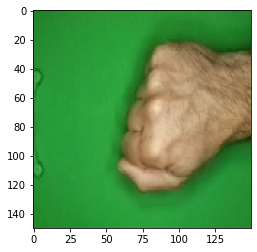

In [22]:
# menerima input gambar dari user dan melakukan prediksi
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')